<a href="https://colab.research.google.com/github/KOMPALALOKESH/NeuralNetworks/blob/main/Fashion_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing lib

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

### importing data

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist
x_train, x_test = x_train/255., x_test/255.

In [4]:
x_valid, y_valid = x_train[-5000:], y_train[-5000:] # last 5000 data items
x_train, y_train = x_train[:-5000], y_train[:-5000] # all except last 5000 data items i.e. validation data

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
(x_train.shape, x_test.shape)

((55000, 28, 28), (10000, 28, 28))

### sequential neural layers

In [7]:
model = tf.keras.Sequential()

In [8]:
model.add(tf.keras.layers.Input(shape=[28,28]))

In [9]:
model.add(tf.keras.layers.Flatten())

In [10]:
model.add(tf.keras.layers.Dense(300, activation='relu'))

In [11]:
model.add(tf.keras.layers.Dense(300, activation='relu'))

In [12]:
model.add(tf.keras.layers.Dense(300, activation='softmax'))

### model summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
Total params: 416100 (1.59 MB)
Trainable params: 416100 (1.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
nn_layer1 = model.layers[1]
nn_layer1.name

'dense'

In [16]:
weights, biases = nn_layer1.get_weights()

In [17]:
(weights.shape, biases.shape)

((784, 300), (300,))

In [18]:
weights

array([[-0.067813  , -0.00043784,  0.01224346, ..., -0.07431412,
        -0.03310187,  0.02673813],
       [-0.02602807, -0.00238498,  0.00865911, ...,  0.02535147,
         0.01188291, -0.01599117],
       [-0.05390926,  0.01170392, -0.04291784, ...,  0.02298464,
        -0.01832285, -0.03459291],
       ...,
       [ 0.01787181, -0.06200707, -0.02520783, ...,  0.05287184,
        -0.02930944, -0.03823274],
       [ 0.02783172, -0.04760466, -0.04985461, ...,  0.06784916,
        -0.05514904,  0.05479547],
       [-0.02424383,  0.03220006, -0.03316853, ..., -0.03366957,
        -0.04690653,  0.00433531]], dtype=float32)

### model compilation

In [19]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### model training and evaluation

In [20]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 19s 6ms/step - loss: 0.8707 - accuracy: 0.7274 - val_loss: 0.5802 - val_accuracy: 0.7968
Epoch 2/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5194 - accuracy: 0.8208 - val_loss: 0.4886 - val_accuracy: 0.8264
Epoch 3/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4664 - accuracy: 0.8367 - val_loss: 0.4618 - val_accuracy: 0.8326
Epoch 4/20
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4352 - accuracy: 0.8487 - val_loss: 0.4140 - val_accuracy: 0.8570
Epoch 5/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4130 - accuracy: 0.8565 - val_loss: 0.4394 - val_accuracy: 0.8360
Epoch 6/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3955 - accuracy: 0.8616 - val_loss: 0.3797 - val_accuracy: 0.8632
Epoch 7/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3810 - accuracy: 0.8668 - val_loss: 0.3842 - val_accuracy

In [21]:
history.history # loss and accuracy at each epoch in training

{'loss': [0.8706626892089844,
  0.5194495916366577,
  0.46642154455184937,
  0.4351871907711029,
  0.412995845079422,
  0.3954721987247467,
  0.38096481561660767,
  0.36778226494789124,
  0.35686877369880676,
  0.3467504382133484,
  0.3365299105644226,
  0.32883191108703613,
  0.32139068841934204,
  0.31222546100616455,
  0.30628272891044617,
  0.29952940344810486,
  0.2934214770793915,
  0.28720542788505554,
  0.28297147154808044,
  0.2763622999191284],
 'accuracy': [0.727436363697052,
  0.8208000063896179,
  0.836654543876648,
  0.8487091064453125,
  0.8565272688865662,
  0.8615818023681641,
  0.8667818307876587,
  0.8697817921638489,
  0.8747818470001221,
  0.8779454827308655,
  0.8806545734405518,
  0.8832908868789673,
  0.8844545483589172,
  0.8885454535484314,
  0.8906182050704956,
  0.8922727108001709,
  0.895618200302124,
  0.8982363343238831,
  0.8997454643249512,
  0.9006909132003784],
 'val_loss': [0.5802275538444519,
  0.488585501909256,
  0.46180638670921326,
  0.413988709

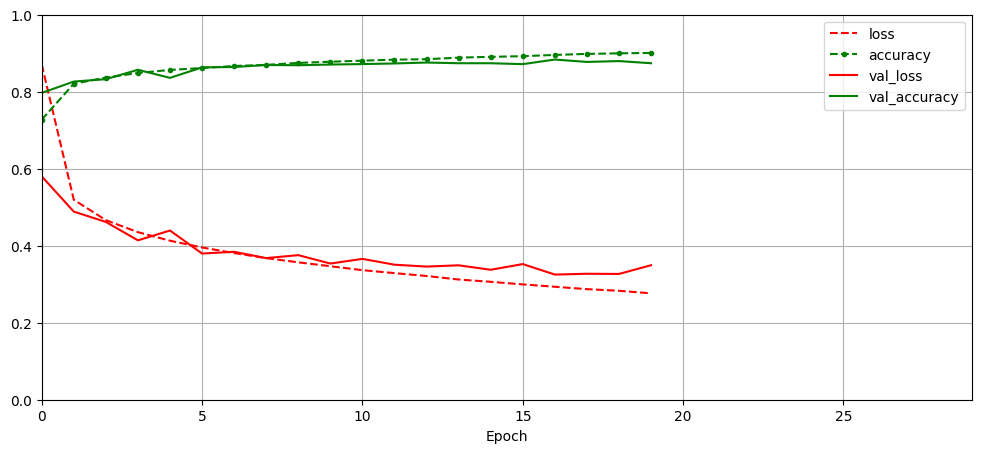

In [22]:
pd.DataFrame(history.history).plot(figsize=(12,5),
                                   xlim=[0, 29],
                                   ylim=[0, 1],
                                   grid=True,
                                   xlabel="Epoch",
                                   style=["r--", "g--.", "r-", "g-"])
plt.legend(loc="upper right")
plt.show()

### model evaluation

In [24]:
model.evaluate(x_train, y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.2853 - accuracy: 0.8962


[0.28532344102859497, 0.8962000012397766]

### model testing

In [25]:
y_predict_proba = model.predict(x_test)
y_predict_proba.round(2)

313/313 [==============================] - 1s 2ms/step


array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.01, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]], dtype=float32)

In [26]:
y_pred = y_predict_proba.argmax(axis=-1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

### accuracy score

In [27]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8649

In [28]:
y_test_name = np.array(class_names)[y_test]
y_pred_name = np.array(class_names)[y_pred]

compare = np.array([(x, y) for x, y in zip(y_test_name, y_pred_name)])
compare

array([['Ankle boot', 'Ankle boot'],
       ['Pullover', 'Pullover'],
       ['Trouser', 'Trouser'],
       ...,
       ['Bag', 'Bag'],
       ['Trouser', 'Trouser'],
       ['Sandal', 'Sandal']], dtype='<U11')

In [29]:
true_items = compare[compare[:,0] == compare[:,1]]
print(len(true_items))
true_items

8649


array([['Ankle boot', 'Ankle boot'],
       ['Pullover', 'Pullover'],
       ['Trouser', 'Trouser'],
       ...,
       ['Bag', 'Bag'],
       ['Trouser', 'Trouser'],
       ['Sandal', 'Sandal']], dtype='<U11')

In [30]:
false_items = compare[compare[:,0] != compare[:,1]]
print(len(false_items))
false_items

1351


array([['Sneaker', 'Sandal'],
       ['Coat', 'Pullover'],
       ['Ankle boot', 'Sandal'],
       ...,
       ['Shirt', 'T-shirt/top'],
       ['Pullover', 'Trouser'],
       ['Coat', 'Pullover']], dtype='<U11')